# Part 1:

1) Give 1 real world example for:
   - Binary Classification Task
   - Multiclass Classification Task
   - Regression Task

Answer:

2)
Classifying into 2 classes, a model produces the following outputs:


| $y_i$     |               $\hat{y_i}$                                  |
|---------|----------------------------------------------------------|
| 1       | 0.9 |
| 1       | 0.4 |
| 0       | 0.3 |
| 0       | 0.6 |

Calculate the binary cross-entropy loss.

3) While improving a model complexity, if you notice that a model's training error is decreasing but the test error is getting higher, what does this indicate about the model's behavior?

Answer:

4. Suppose we have a dataset with categorical targets $Y = ${$1, ..., K$}. 

Let $n_k$ be the size of the $k$-th category :

$$
n_k = \sum_{i=1}^{n} \mathbb{I}[y_i = k], \quad \sum_{k=1}^{K} n_k = n.
$$

Consider a dummy model which always predicts category $l$, $1<l<K$. What is the value of the error rate ? For which $l$
 it is minimal?

5. The MSE for a constant model $f_\theta(x_i) = c$ is given by : 

$$
\frac{1}{n} \sum_{i=1}^{n} (y_i - c)^2.
$$

Find the constant $c$ that minimizes the MSE.

# Part 2:

### Step 1 : Generate synthetic data (Y) following any type of distributions.


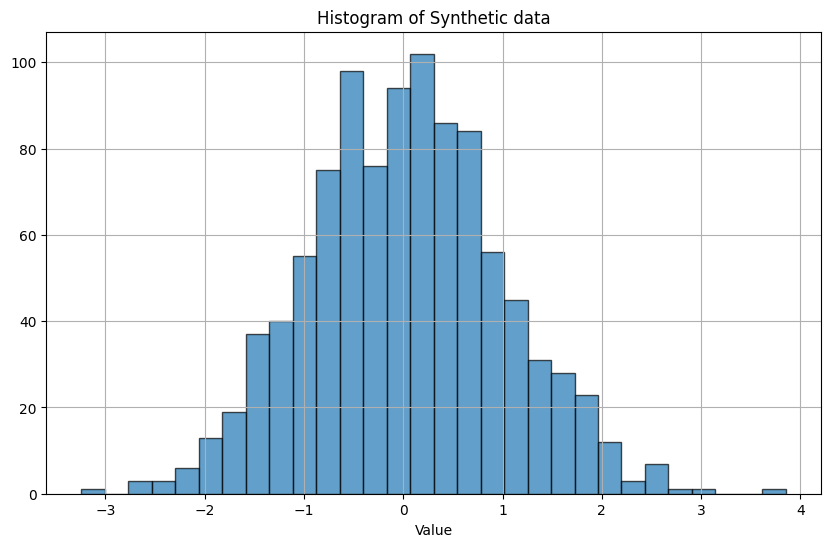

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

mean = 0
std_dev = 1
num_samples = 1000
synthetic_data = np.random.normal(mean, std_dev, num_samples)

plt.figure(figsize=(10, 6))
plt.hist(synthetic_data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Synthetic data')
plt.xlabel('Value')
plt.grid()
plt.show()


### Step 2 : Define a function to compute MSE


In [2]:
import numpy as np

def compute_mse(true_values, predicted_values):
    mse = np.mean((true_values - predicted_values) ** 2)
    return mse

if __name__ == "__main__":
    true_values = np.array([1, 2, 3, 4, 5])
    predicted_values = np.array([1.1, 1.9, 3.2, 4.1, 4.8])
    mse = compute_mse(true_values, predicted_values)
    print(f"Mean squared error: {mse}")

    

Mean squared error: 0.02200000000000002


### Step 3 : Find the optimal c, compare it to the mean of you synthetic dataset


Optimal c: 0.01933205582232549
Mean of synthetic dataset: 0.01933205582232549


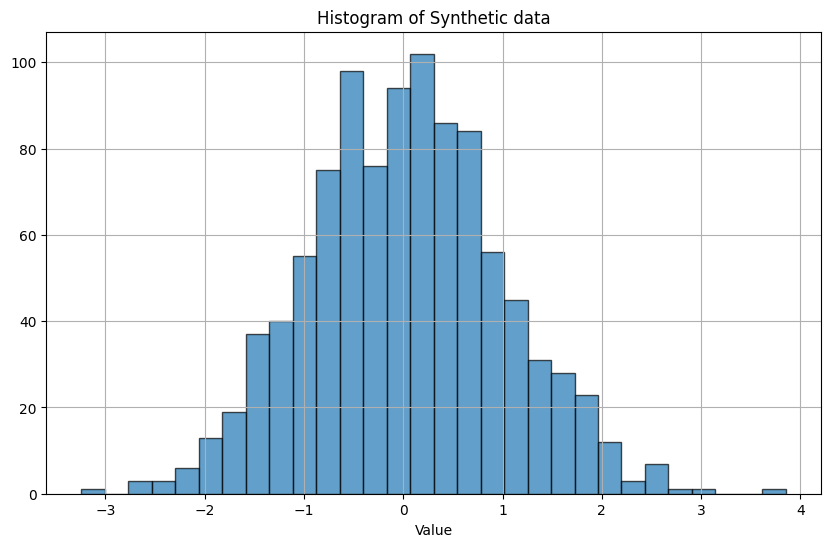

In [3]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

np.random.seed(42)

mean = 0
std_dev = 1
num_samples = 1000
synthetic_data = np.random.normal(mean, std_dev, num_samples)

def compute_mse(true_values, predicted_values):
    mse = np.mean((true_values - predicted_values) ** 2)
    return mse

def mse_for_constant_c(c, data):
    predicted_values = np.full_like(data, c)
    return compute_mse(data, predicted_values)

result = minimize(lambda c: mse_for_constant_c(c, synthetic_data), x0=np.mean(synthetic_data))
optimal_c = result.x[0]

mean_of_synthetic_data = np.mean(synthetic_data)

print(f"Optimal c: {optimal_c}")
print(f"Mean of synthetic dataset: {mean_of_synthetic_data}")


plt.figure(figsize=(10, 6))
plt.hist(synthetic_data, bins=30, edgecolor='k', alpha=0.7)
plt.title('Histogram of Synthetic data')
plt.xlabel('Value')
plt.grid()
plt.show() 

### Step 4 : Plot the MSE curve and the optimal c

Optimal c: 0.01933205582232549
Mean of synthetic dataset: 0.01933205582232549


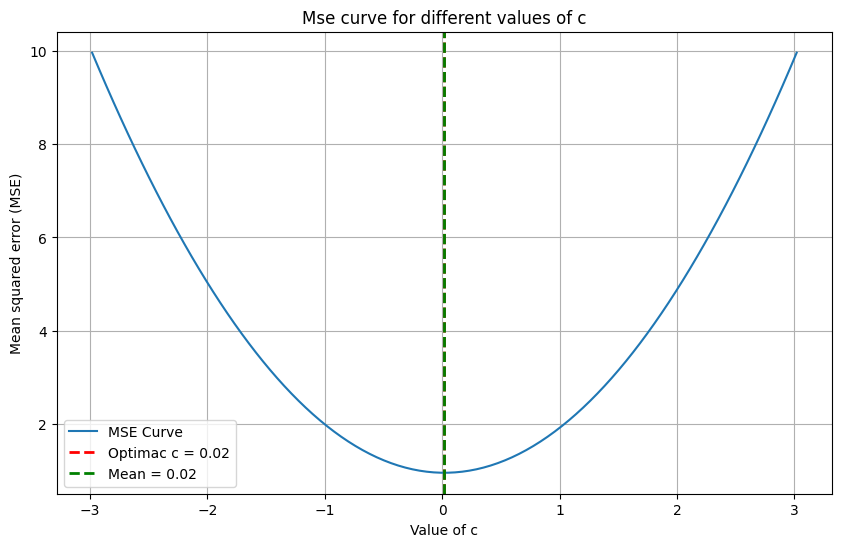

In [4]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

np.random.seed(42)

mean = 0
std_dev = 1
num_samples = 1000
synthetic_data = np.random.normal(mean, std_dev, num_samples)

def compute_mse(true_values, predicted_values):
    mse = np.mean((true_values - predicted_values) ** 2)
    return mse

def mse_for_constant_c(c, data):
    predicted_values = np.full_like(data, c)
    return compute_mse(data, predicted_values)

result = minimize(lambda c: mse_for_constant_c(c, synthetic_data), x0=np.mean(synthetic_data))
optimal_c = result.x[0]

mean_of_synthetic_data = np.mean(synthetic_data)

print(f"Optimal c: {optimal_c}")
print(f"Mean of synthetic dataset: {mean_of_synthetic_data}")

c_values = np.linspace(mean_of_synthetic_data - 3 * std_dev, mean_of_synthetic_data + 3 * std_dev, 100)
mse_values = [mse_for_constant_c(c, synthetic_data) for c in c_values]

plt.figure(figsize=(10, 6))
plt.plot(c_values, mse_values, label='MSE Curve')
plt.axvline(optimal_c, color='r', linestyle='dashed', linewidth=2, label=f'Optimac c = {optimal_c:.2f}')
plt.axvline(mean_of_synthetic_data, color='g', linestyle='dashed', linewidth=2, label=f'Mean = {mean_of_synthetic_data:.2f}')
plt.title("Mse curve for different values of c")
plt.xlabel('Value of c')
plt.ylabel('Mean squared error (MSE)')
plt.legend()
plt.grid()
plt.show()


# Part 3 : 

Write your own implementation of splitting the dataset on train and test using shuffling:

In [5]:
def train_test_split(X, y, test_size=0.2):
    """
    Split the dataset into training and testing sets.

    Parameters:
    X (numpy array): The feature matrix.
    y (numpy array): The target labels.
    test_size (float): The proportion of the dataset to include in the test split.

    Returns:
    X_train (numpy array): The training feature matrix.
    X_test (numpy array): The testing feature matrix.
    y_train (numpy array): The training labels.
    y_test (numpy array): The testing labels.
    """

    # YOUR CODE GOES HERE
    
    X = np.array(X)
    y = np.array(y)
    
    n_samples = len(X)
    n_test = int(n_samples * test_size)
    
    indices = np.random.permutation(n_samples)
    
    test_indices = indices[:n_test]
    train_indices = indices[n_test:]
    
    X_train = X[train_indices]
    X_test = X[test_indices]
    y_train = y[train_indices]
    y_test = y[test_indices]
    return X_train, X_test, y_train, y_test


# Example Usage
X = [[1, 2], [3, 4], [5, 6], [7, 8]]
y = [0, 1, 0, 1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("X_train:", X_train)
print("X_test:", X_test)
print("y_train:", y_train)
print("y_test:", y_test)


X_train: [[3 4]
 [1 2]
 [5 6]]
X_test: [[7 8]]
y_train: [1 0 0]
y_test: [1]


Run the following tests to ensure that your implementation works as expected. <br>
<strong>Don't modify the cells</strong>!

In [6]:
def test_basic_split():
    X = [[1, 2], [3, 4], [5, 6], [7, 8]]
    y = [0, 1, 0, 1]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Check if the correct number of samples is in the train and test sets
    assert len(X_train) == 3, f"Expected 3 training samples, got {len(X_train)}"
    assert len(X_test) == 1, f"Expected 1 test sample, got {len(X_test)}"
    assert len(y_train) == 3, f"Expected 3 training labels, got {len(y_train)}"
    assert len(y_test) == 1, f"Expected 1 test label, got {len(y_test)}"
    
    print("Basic split test passed.")
    
test_basic_split()

Basic split test passed.


In [7]:
def test_empty_dataset():
    X = []
    y = []
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Check if the splits are empty
    assert len(X_train) == 0, f"Expected 0 training samples, got {len(X_train)}"
    assert len(X_test) == 0, f"Expected 0 test samples, got {len(X_test)}"
    assert len(y_train) == 0, f"Expected 0 training labels, got {len(y_train)}"
    assert len(y_test) == 0, f"Expected 0 test labels, got {len(y_test)}"
    
    print("Empty dataset test passed.")
    
test_empty_dataset()

Empty dataset test passed.


In [8]:
def test_different_test_size():
    X = [[1, 2], [3, 4], [5, 6], [7, 8]]
    y = [0, 1, 0, 1]
    
    # Test with 50% test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
    assert len(X_test) == 2, f"Expected 2 test samples, got {len(X_test)}"
    
    # Test with 25% test size
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    assert len(X_test) == 1, f"Expected 1 test sample, got {len(X_test)}"
    
    print("Different test_size values test passed.")
test_different_test_size()

Different test_size values test passed.


In [9]:
from sklearn.datasets import load_iris

data = load_iris()
X = data.data
y = data.target

def test_real_dataset():
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)
    
    # Check the size of the train and test sets
    assert len(X_train) == 105, f"Expected 105 training samples, got {len(X_train)}"
    assert len(X_test) == 45, f"Expected 45 test samples, got {len(X_test)}"
    
    print("Real dataset test passed.")
test_real_dataset()

Real dataset test passed.


In [10]:
def run_tests():
    test_basic_split()
    test_empty_dataset()
    test_different_test_size()
    test_real_dataset()

run_tests()

Basic split test passed.
Empty dataset test passed.
Different test_size values test passed.
Real dataset test passed.
